# Numeric Differentiation

In [187]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import typing
import pandas as pd

Key to exercises:
* `(R)`: Reproduction. You can solve these without referring back to the lecture notebooks.
* `(A)`: Application. Solving these may require looking up stuff in the lecture notebooks or online.
* `(T)`: Transfer. These may require some thinking, or referring to the internet.
* `(*)`: Especially difficult tasks. These might take some time even for experienced programmers.

## Problem Statement

Suppose you have an unknown function you need to differentiate. Examples include:
* measurement data
* simulated processes
* algorithms
* neural networks

How do we calculate the derivative *numerically*, that is, simply from data samples?
* which step size do we use to sample the data?
* which errors can we expect?
* how do we minimize errors?

### Derivatives

Recall the different symbols for the first derivative:
$$\frac{\mathrm{d}}{\mathrm{d}x}~f(x)= f'(x) = f^{(1)}(x)$$

And for the $n$-th derivative:
$$\frac{\mathrm{d}^n}{\mathrm{d}x^n}~f(x)= f^{\overbrace{'\,'\dots'}^{n~\text{times}}}(x) = f^{(n)}(x)$$

As well as the definition of the first derivative:
$$\frac{\mathrm{d}}{\mathrm{d}x}~f(x) := \lim_{h\rightarrow 0} \frac{f(x+h) - f(x)}{h}$$

## One-Directional Finite Differences

We can apply the formula from above to calculate the *forward finite differences* (ffd) or, equivalently, the *backward finite differences* (bfd) of the data points:

$$\operatorname{df}_{h, \text{ffd}}(x_0) = \frac{f(x_0 + h) - f(x_0)}{h};~~~~~~~~\operatorname{df}_{h, \text{bfd}}(x_0) = \frac{f(x_0) - f(x_0 - h)}{h};$$

### Example: The "erf" function

As a concrete example and "test bed", let's choose the "erf" function `np.math.erf` (borrowed from `math.erf`):
* has no analytical expression
* analytical derivative is known
* can easily sample and plot

In [188]:
erf_sample = pd.DataFrame({'x': np.linspace(-2, 2, 40)})

erf_sample['erf'] = erf_sample['x'].apply(np.math.erf)

<Axes: xlabel='x', ylabel='erf'>

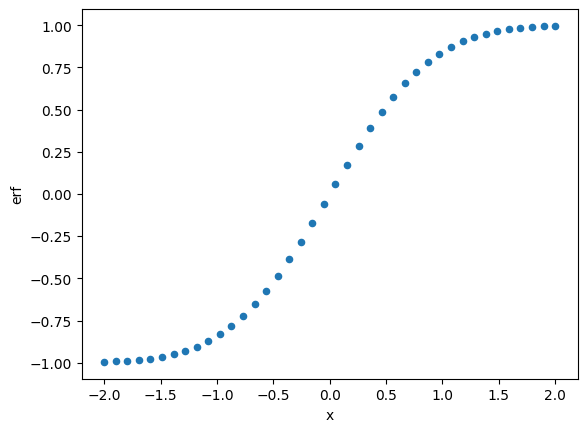

In [189]:
erf_sample.plot.scatter(x='x', y='erf')

### Exercises
* `(R)` Calculate the finite forward and backward differences of the data points and save them to the columns `ffd` and `fbd` of the DataFrame. Plot the results into a single graphic.
* `(A)` What might the *analytical* derivative be? Plot your guess into the same graphic as above.
* `(A)` Compare your results. What do you find?
* `(T)` What happens if you take a new sample with smaller or larger step size `h`?
* `(T)` For different step sizes, compare the mean absolute error vs. the exact value. What do you find?

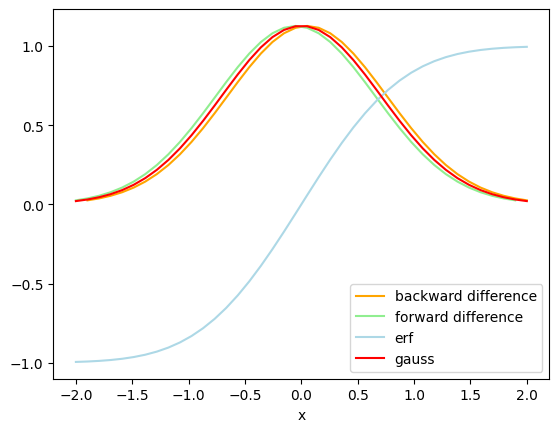

In [190]:
erf_sample['bdd'] = erf_sample['erf'].diff() / erf_sample['x'].diff()
erf_sample['ffd'] = erf_sample['erf'].diff(periods=-1) / erf_sample['x'].diff(periods=-1)

erf_sample['gauss'] = np.exp(-erf_sample['x']**2) * 2 / np.sqrt(np.pi)

axes = plt.axes()
erf_sample.plot(x='x', y='bdd', ax=axes, label='backward difference', color='orange')
erf_sample.plot(x='x', y='ffd', ax=axes, label='forward difference', color='lightgreen')
erf_sample.plot(x='x', y='erf', ax=axes, label='erf', color='lightblue')
erf_sample.plot(x='x', y='gauss', ax=axes, label='gauss', color='red')
axes.legend()

In [191]:
...

Ellipsis

...

## Taylor Series

The Taylor series expresses the fact that a well-behaved function is *locally* defined by its derivatives and vice versa.

For small $\Delta x$, a function is equal to its Taylor series:
$$
\begin{align}f(x_0 + \Delta x) &= f(x_0) + \lim_{N \rightarrow \infty} \sum_{n=1}^N f^{(n)}(x_0) \frac{(\Delta x)^n}{n!}\\
f(x_0 + \Delta x) &= f(x_0) + \sum_{n=1}^N f^{(n)}(x_0) \frac{(\Delta x)^n}{n!} + \mathcal{O}\left((\Delta x)^{N+1}\right)\\
&\approx f(x_0) + \sum_{n=1}^N f^{(n)}(x_0) \frac{(\Delta x)^n}{n!}
\end{align}
$$

Formally, this holds within the *radius of convergence* of the function $f$ at point $x_0$, which is infinite for so-called "entire" functions.

## Central Finite Differences

We can use the Taylor Series to get an *improved* method for calculating numerical derivatives:

$$f(x + h) = f(x) + f'(x) h + \frac{f''(x)}{2} h^2 + \frac{f'''(x)}{6} h^3 + \mathcal{O}\left(h^{4}\right)$$
$$f(x - h) = f(x) - f'(x) h + \frac{f''(x)}{2} h^2 - \frac{f'''(x)}{6} h^3 + \mathcal{O}\left(h^{4}\right)$$
$$f(x + h) - f(x - h) = 2\,f'(x)\,h + \frac{f'''(x)}{3} h^3 + \mathcal{O}\left(h^{5}\right)$$

So, we can define the *central finite differences* as

$$\operatorname{df}_{h, \text{cfd}}(x_0) = \frac{f(x_0 + h) - f(x_0 - h)}{2 h}$$

with error
$$\operatorname{df}_{h, \text{cfd}}(x_0) - f'(x_0) = \frac{f'''(x)}{6} h^2 + \mathcal{O}(h^4)$$

* The error is *quadratic* in the step size
* smaller step sizes will give a much more accurate result
* no additional computational effort needed!

### Exercises

`(R)` Write functions `ffd` and `cfd` which compute the forward and central finite difference for a given function `func`, base point `x0`, and step size `h`. Your functions shall have the following signatures:
```python
ffd(func: callable, x0: float, h: float) -> float
cfd(func: callable, x0: float, h: float) -> float
```

`(T)` Make sure that your functions are *vectorized* with respect to `h` and `x0`:
```python
ffd(func: np.ufunc, x0: np.typing.ArrayLike, h: np.typing.ArrayLike) -> np.ndarray
cfd(func: np.ufunc, x0: np.typing.ArrayLike, h: np.typing.ArrayLike) -> np.ndarray
```
If `np.ndarray`s are passed for both `x0` and `h`, use `h` as the innermost index. You may assume that `h` is one-dimensional.

`(R)` Consider the exponential function `np.exp`. What is its derivative at $x_0 = 1$?

`(R)` Create a `pd.DataFrame` with reasonably spaced values for the `'step_size'` $h$ in the range $\left[10^{-16},10^{-1}\right]$.

`(A)` With these values, numerically determine the derivative of `np.exp` via both forward and central difference methods at $x_0 = 1$. Determine the absolute error $\left|f'(x_0) - \operatorname{df}_h(x_0)\right|$ for the two methods. Plot your results in a suitable form.

`(T)` Interpret those graphs.

In [192]:
def ffd(func: np.ufunc, x0: np.typing.ArrayLike, h: np.typing.ArrayLike) -> np.ndarray:
    if isinstance(h, (int, float, np.float128)):
        h = np.array([h])
    if isinstance(x0, (int, float, np.float128)):
        x0 = np.array([x0])
    return np.array([[(func(x + i) - func(x)) / i for i in h] for x in x0])


def cfd(func: np.ufunc, x0: np.typing.ArrayLike, h: np.typing.ArrayLike) -> np.ndarray:
    if isinstance(h, (int, float, np.float128)):
        h = np.array([h])
    if isinstance(x0, (int, float, np.float128)):
        x0 = np.array([x0])
    return np.array([[(func(x + i) - func(x - i)) / (2 * i) for i in h] for x in x0])



Automatic test cases for the `np.sin` function are included. The first set of tests needs to pass whether or not you vectorized your function:

In [193]:
test_cases = np.load('tests/derivatives.npz')

In [194]:
for x0, row in zip(test_cases['x0'], test_cases['ffd']):
    for h, result in zip(test_cases['h'], row):
        np.testing.assert_allclose(ffd(np.sin, x0, h), result, rtol=0, atol=1e-7)

In [195]:
for x0, row in zip(test_cases['x0'], test_cases['cfd']):
    for h, result in zip(test_cases['h'], row):
        np.testing.assert_allclose(cfd(np.sin, x0, h), result, rtol=0, atol=1e-7)

The following tests need to run only for the vectorized functions:

In [196]:
np.testing.assert_allclose(ffd(np.sin, test_cases['x0'], test_cases['h']), test_cases['ffd'], rtol=0, atol=1e-7)

In [197]:
np.testing.assert_allclose(cfd(np.sin, test_cases['x0'], test_cases['h']), test_cases['cfd'], rtol=0, atol=1e-7)

...

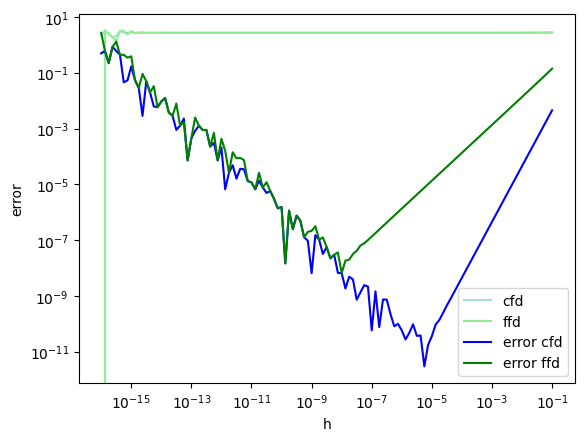

In [201]:
errors = pd.DataFrame({'h': np.logspace(-16, -1, 121)})

errors['value_cfd'] = cfd(np.exp, 1, errors['h']).flatten()
errors['value_ffd'] = ffd(np.exp, 1, errors['h']).flatten()
errors['error_cfd'] = np.abs(errors['value_cfd'] - np.exp(1))
errors['error_ffd'] = np.abs(errors['value_ffd'] - np.exp(1))

axes = plt.axes()
errors.plot(x='h', y='value_cfd', ax=axes, label='cfd', color='lightblue')
errors.plot(x='h', y='value_ffd', ax=axes, label='ffd', color='lightgreen')
errors.plot(x='h', y='error_cfd', ax=axes, label='error cfd', color='blue')
errors.plot(x='h', y='error_ffd', ax=axes, label='error ffd', color='green')
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel('h')
axes.set_ylabel('error')
axes.legend()


In [199]:
...

Ellipsis

...

## Numerical Error

Numerical methods such as numeric differentiation have to contend with limited *precision* of machine representations of numbers.

### Discretization Error

When the step size of a numerical method is insufficiently small, discretization errors may occur.
* error can be given in terms of the step size
* e.g. differentiation: tight bounds by step size

### Numerical Extinction

* floats cannot resolve small differences between huge numbers
* when subtracting two huge numbers, the difference may not be represented accurately
* leads to huge errors past a certain point
* errors become *worse* with smaller step size

### Exercises

Consider the exponential function offset by $10^8$, `lambda x: np.exp(x) + 1e8`.

`(R)` What is its derivative at `x0 = 1`? How does it relate to the derivative of the "standard" exponential function?

`(A)` Numerically determine the derivative of this function and the non-offset exponential function with the central difference methods at $x_0 = 1$ for various step sizes. Determine the absolute error $\left|f'(x_0) - \operatorname{df}_h(x_0)\right|$. Plot your results in a suitable form.

`(T)` Discuss your results.

...

In [202]:
errors = pd.DataFrame({'h': np.logspace(-16, -1, 121)})

errors['cfd'] = cfd(np.exp, 1, errors['h']).flatten()
errors['cfd_offset'] = cfd(lambda x:np.exp + 1e8, 1, errors['h']).flatten()
errors['error_cfd'] = np.abs(errors['cfd'] - np.exp(1))
errors['error_offset'] = np.abs(errors['cfd_offset'] - np.exp(1))

axes = plt.axes()
errors.plot(x='h', y='value_cfd', ax=axes, label='cfd', color='lightblue')
errors.plot(x='h', y='value_ffd', ax=axes, label='ffd', color='lightgreen')
errors.plot(x='h', y='error_cfd', ax=axes, label='error cfd', color='blue')
errors.plot(x='h', y='error_ffd', ax=axes, label='error ffd', color='green')
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel('h')
axes.set_ylabel('error')
axes.legend()

TypeError: unsupported operand type(s) for +: 'numpy.ufunc' and 'float'

...

## Second and Higher Derivatives

We may apply the same method to construct formulas for higher derivatives:

$$f(x + h) = f(x) + f'(x) h + \frac{f''(x)}{2} h^2 + \frac{f'''(x)}{6} h^3 + \mathcal{O}\left(h^{4}\right)$$
$$f(x - h) = f(x) - f'(x) h + \frac{f''(x)}{2} h^2 - \frac{f'''(x)}{6} h^3 + \mathcal{O}\left(h^{4}\right)$$
$$f(x + h) + f(x - h) = 2\,f(x) + f''(x)~h^2 + \mathcal{O}\left(h^{4}\right)$$

$$f''(x) = \frac{f(x + h) -2 f(x) + f(x - h)}{h^2} + \mathcal{O}(h^2)$$

Further improvements are possible for increased numeric stability and precision. These may use the derivatives for $\frac{h}{2}$, $\frac{h}{4}$ etc and cleverly combine them.